## INSTITUT UNIVERSITAIRE SAINT JEAN DU CAMEROUN
### PROJET Machine Learning 

- Annee Academique : 2025 - 2026
- Classe : INGE 5 ISI
- Etudiant : NEUGANG Jordan Nathan
 

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("plant_disease_dataset.csv")

data.head()

,leaf_length,leaf_width,stem_diameter,soil_type,weather,pesticide,disease_type
0,13.004714,5.660022,0.949863,clay,sunny,no,mildew
1,10.154737,4.629234,0.830726,loamy,sunny,no,rust
2,10.163748,4.914582,1.643545,sandy,rainy,yes,rust
3,7.150504,5.855898,1.642681,loamy,cloudy,yes,rust
4,12.959888,1.937398,1.767460,sandy,rainy,yes,mildew


# I - PRETRAITEMENT

### 1- Type des données

In [205]:
#verification
data.dtypes

leaf_length      float64
leaf_width       float64
stem_diameter    float64
soil_type         object
weather           object
pesticide         object
disease_type      object
dtype: object

### 2- Donnée manquante

In [206]:
#verification

data.isna().sum()

leaf_length      26
leaf_width        0
stem_diameter    25
soil_type         0
weather           0
pesticide         0
disease_type      0
dtype: int64

In [207]:
#correction

for label in ["leaf_length", "stem_diameter"] :
    data[label].fillna(data[label].mean(), inplace=True)



In [208]:
#verification

data.isna().sum()

leaf_length      0
leaf_width       0
stem_diameter    0
soil_type        0
weather          0
pesticide        0
disease_type     0
dtype: int64

### 3- Doublon

In [209]:
#verification 

data.duplicated().value_counts()

False    500
True      40
Name: count, dtype: int64

In [210]:
# Correction
data = data.drop_duplicates()


In [211]:
#verification

data.duplicated().value_counts()

False    500
Name: count, dtype: int64

# II - STATS DESCRIPTIVES

### 1 - Description des données

In [212]:
data.describe()

,leaf_length,leaf_width,stem_diameter
count,500.000000,500.000000,500.000000
mean,10.032458,5.047739,1.031904
std,1.909224,1.466996,0.297235
min,3.517465,0.954670,0.131123
25%,8.709034,4.107062,0.830017
50%,10.043668,5.042797,1.029936
75%,11.232675,5.976863,1.217108
max,17.705463,8.948573,1.780505


### 2 - Correlation entre les variables 

<Axes: >

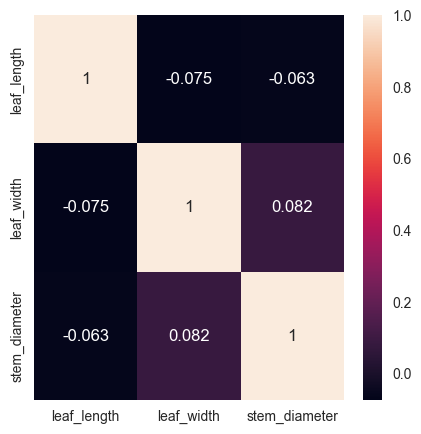

In [213]:

plt.figure(figsize=(5, 5))
sns.heatmap(data.select_dtypes(include=["number"]).corr(), annot=True)

### 3- Variation entre les variables

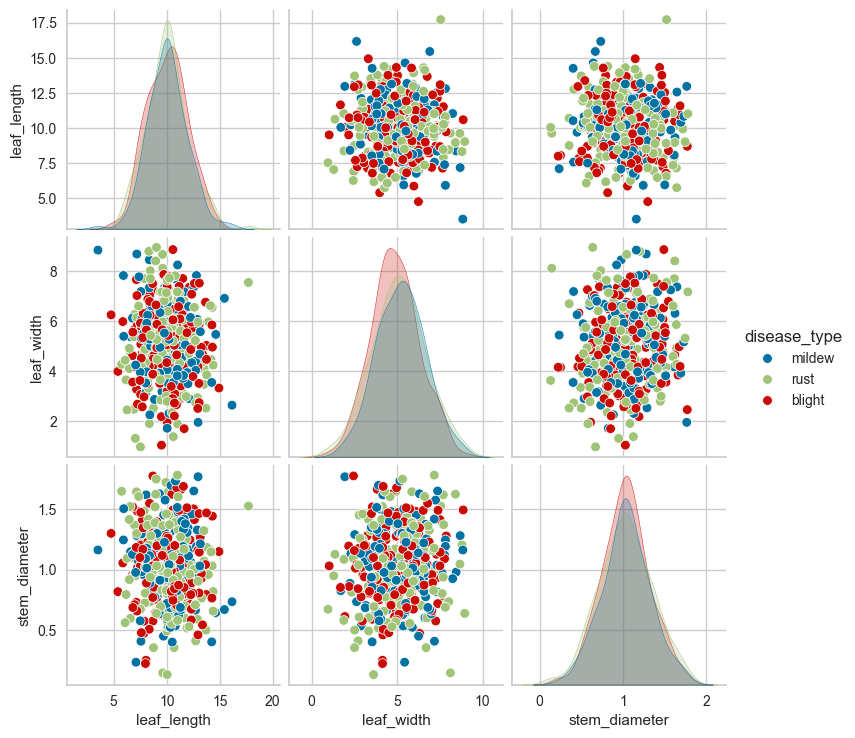

In [214]:

sns.pairplot(data=data, hue="disease_type")


### 4 - Valeur aberrante

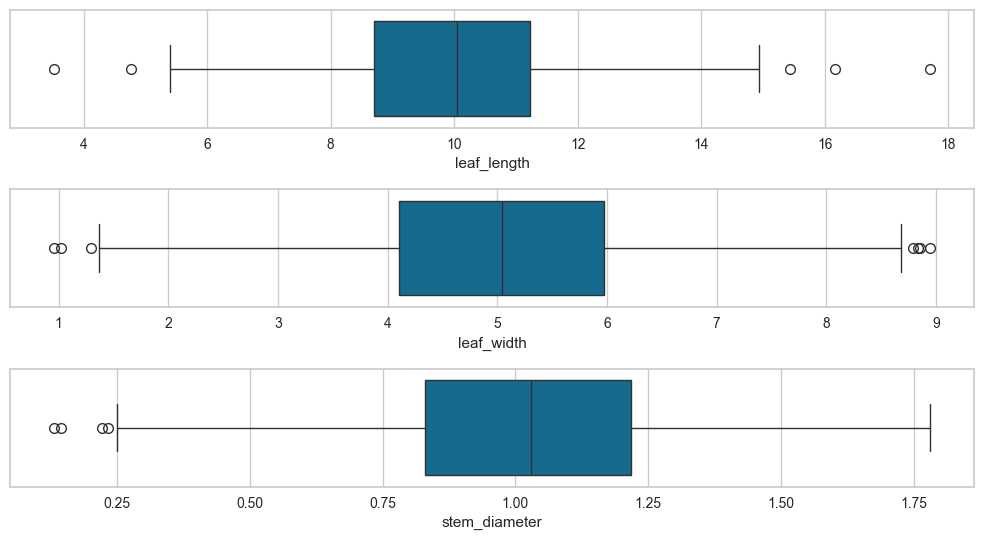

In [215]:
#verification

plt.figure(figsize=(10, 50))
i = 1
for label in data.select_dtypes(include=["number"]).columns:
    plt.subplot(28, 1, i)
    sns.boxplot(x=label, data=data)
    i += 1

plt.tight_layout()
plt.show()

In [216]:
#correction

def replace_outliers(df):
    numeric_cols = df.select_dtypes(include=["number"]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

replace_outliers(data)


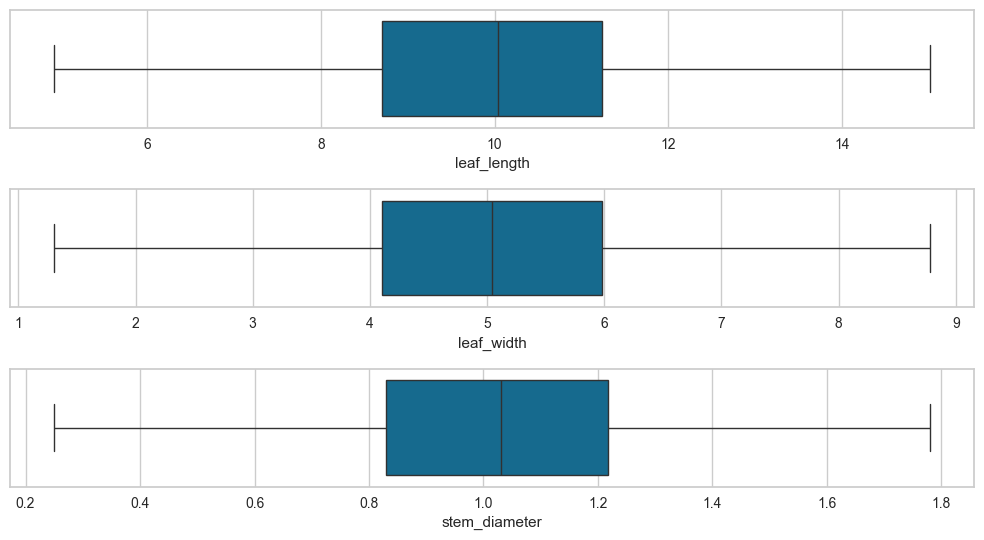

In [217]:
#verification

plt.figure(figsize=(10, 50))
i = 1
for label in data.select_dtypes(include=["number"]).columns:
    plt.subplot(28, 1, i)
    sns.boxplot(x=label, data=data)
    i += 1

plt.tight_layout()
plt.show()

# III - VARIABLE

### 1 - Variable Explicative

#### i- Transformation variable categorielle

In [218]:

#correction
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


le = LabelEncoder()

data['pesticide'] = le.fit_transform(data['pesticide'])



def multi_encoder(data, labels):
    
    # Copie pour éviter de modifier l'original
    data = data.copy()
    
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    
    for label in labels:
        
        # Encodage
        encoded = encoder.fit_transform(data[[label]])
        
        # DataFrame avec noms de colonnes
        encoded_df = pd.DataFrame(
            encoded,
            columns=encoder.get_feature_names_out([label]),
            index=data.index
        )
        
        # Ajouter les nouvelles colonnes
        data = pd.concat([data, encoded_df], axis=1)
        
        # Supprimer la colonne originale
        data.drop(columns=[label], inplace=True)
    
    return data

labels = ["soil_type", "weather"]
data = multi_encoder(data, labels)


#### ii- selection 

In [219]:

X =  data.drop("disease_type", axis=1)
X

,leaf_length,leaf_width,stem_diameter,pesticide,soil_type_clay,soil_type_loamy,soil_type_sandy,weather_cloudy,weather_rainy,weather_sunny
0,13.004714,5.660022,0.949863,0,1.0,0.0,0.0,0.0,0.0,1.0
1,10.154737,4.629234,0.830726,0,0.0,1.0,0.0,0.0,0.0,1.0
2,10.163748,4.914582,1.643545,1,0.0,0.0,1.0,0.0,1.0,0.0
3,7.150504,5.855898,1.642681,1,0.0,1.0,0.0,1.0,0.0,0.0
4,12.959888,1.937398,1.767460,1,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
534,10.733196,2.711712,0.841415,1,0.0,1.0,0.0,0.0,0.0,1.0
535,8.465305,7.691837,0.937203,1,0.0,1.0,0.0,1.0,0.0,0.0
537,12.271131,4.854930,0.792128,1,0.0,0.0,1.0,0.0,1.0,0.0
538,11.121569,6.573514,0.871178,1,0.0,0.0,1.0,0.0,0.0,1.0


### 2- Variable à Predire

In [220]:

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

Y = labelencoder.fit_transform(data['disease_type'])
Y


array([1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0,
       2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       0, 2, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 0,
       2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0,
       0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 0, 0, 1, 0,
       0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0,
       0, 0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2,

# III- MODEL

### 1- separation des données (Train VS Test)

- 80% pour l'entrainnement
- 20% pour les test

In [221]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=23)


### 2 - standardisation des données

In [222]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)


## A - Implementation de la Regression Logistique

### 1 - Model standard

#### a- Definition et Entrainnement du model

In [223]:

#Entrainnement du model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000)
model.fit(X_train_sc, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### b - Evaluation du Model

ici, je defini les fonctions que je vais utiliser plus bas pour la representation des differente vue utiliser pour evaluer le model

In [224]:
import numpy as np
from sklearn.metrics import confusion_matrix

def format_annotations(cm):
    row_sums = cm.sum(axis=1, keepdims=True)
    pct = np.divide(cm, row_sums, out=np.zeros_like(cm, dtype=float), where=row_sums != 0)
    return np.array([
        [f"{cm[i, j]}\n({pct[i, j] * 100:.1f}%)" for j in range(cm.shape[1])]
        for i in range(cm.shape[0])
    ])

def confusion_matrix_analysis(Y_train, Y_test, Y_predic_train, Y_predic_test):
    cm_train = confusion_matrix(Y_train, Y_predic_train)
    cm_test = confusion_matrix(Y_test, Y_predic_test)

    # Utilise le labelencoder de disease_type
    if "labelencoder" in globals():
        class_names = labelencoder.classes_
    else:
        class_names = np.unique(np.concatenate([Y_train, Y_test]))

    annot_train = format_annotations(cm_train)
    annot_test = format_annotations(cm_test)

    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
    cmap = sns.cubehelix_palette(start=0.5, rot=-0.75, as_cmap=True)
    vmax = max(cm_train.max(), cm_test.max())

    sns.heatmap(cm_train, annot=annot_train, fmt="", cmap=cmap, xticklabels=class_names, yticklabels=class_names, cbar=False, vmin=0, vmax=vmax, ax=axes[0])
    axes[0].set_title("Train")
    axes[0].set_xlabel("Prédictions")
    axes[0].set_ylabel("Réel")

    sns.heatmap(cm_test, annot=annot_test, fmt="", cmap=cmap, xticklabels=class_names, yticklabels=class_names, cbar=True, vmin=0, vmax=vmax, ax=axes[1])
    axes[1].set_title("Test")
    axes[1].set_xlabel("Prédictions")
    axes[1].set_ylabel("")

    fig.suptitle("Matrices de confusion (comptes et %)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    
# -------------------------------------------------------------------------------

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def roc_curve_analysis(model, X_train, Y_train, X_test, Y_test):
        
    classes = model.classes_
    if "class_names" in globals() and len(class_names) == len(classes):
        display_labels = class_names
    else:
        display_labels = [str(label) for label in classes]

    probas_train = model.predict_proba(X_train)
    probas_test = model.predict_proba(X_test)

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
    for ax in axes:
        ax.plot([0, 1], [0, 1], "k--", label="Aléatoire")
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

    if len(classes) == 2:
        pos_idx = 1
        pos_label = classes[pos_idx]
        pos_name = display_labels[pos_idx]
        splits = [(axes[0], Y_train, probas_train, "Train"), (axes[1], Y_test, probas_test, "Test")]
        for ax, y_true, probas, split_name in splits:
            fpr, tpr, _ = roc_curve(y_true, probas[:, pos_idx], pos_label=pos_label)
            roc_auc = auc(fpr, tpr)
            ax.plot(fpr, tpr, label=f"{split_name} ({pos_name}, AUC = {roc_auc:.2f})")
            ax.set_title(f"ROC {split_name}")
    else:
        y_train_bin = label_binarize(Y_train, classes=classes)
        y_test_bin = label_binarize(Y_test, classes=classes)
        splits = [
            (axes[0], y_train_bin, probas_train, "Train"),
            (axes[1], y_test_bin, probas_test, "Test"),
        ]
        for ax, y_bin, probas, split_name in splits:
            for idx, cls in enumerate(classes):
                fpr, tpr, _ = roc_curve(y_bin[:, idx], probas[:, idx])
                roc_auc = auc(fpr, tpr)
                ax.plot(fpr, tpr, label=f"{display_labels[idx]} (AUC = {roc_auc:.2f})")
            ax.set_title(f"ROC {split_name}")

    axes[0].set_ylabel("Taux de vrais positifs")
    for ax in axes:
        ax.set_xlabel("Taux de faux positifs")
        ax.legend(loc="lower right")

    fig.suptitle("Courbes ROC (train vs test)", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


##### i- matrice de confusion 

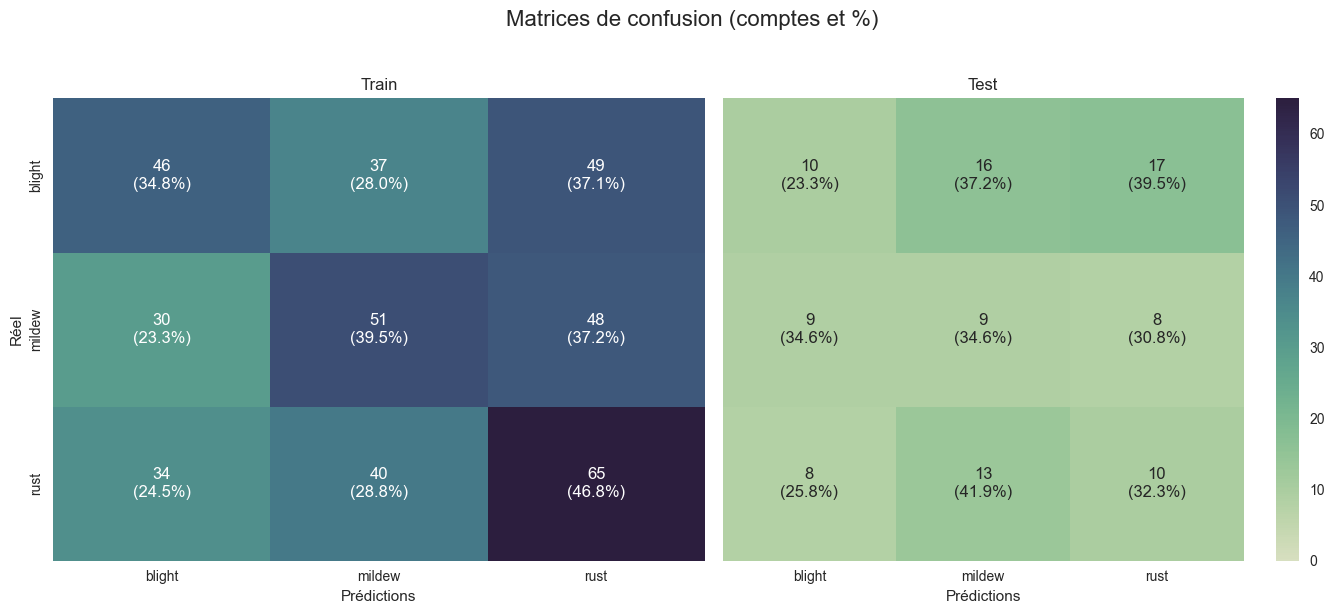

In [225]:

Y_predic_train = model.predict(X_train_sc)
Y_predic_test = model.predict(X_test_sc)


confusion_matrix_analysis(Y_train, Y_test, Y_predic_train, Y_predic_test)


##### ii- Classification Report


In [226]:
from sklearn.metrics import classification_report

print("\t\t\tMETRIQUE POUR LES DONNEES D'TRAINNEMENT")
print(classification_report(Y_train, Y_predic_train))

print("\n\n\n")

print("\t\t\tMETRIQUE POUR LES DONNEES DE TEST")
print(classification_report(Y_test, Y_predic_test))


			METRIQUE POUR LES DONNEES D'TRAINNEMENT
              precision    recall  f1-score   support

           0       0.42      0.35      0.38       132
           1       0.40      0.40      0.40       129
           2       0.40      0.47      0.43       139

    accuracy                           0.41       400
   macro avg       0.41      0.40      0.40       400
weighted avg       0.41      0.41      0.40       400





			METRIQUE POUR LES DONNEES DE TEST
              precision    recall  f1-score   support

           0       0.37      0.23      0.29        43
           1       0.24      0.35      0.28        26
           2       0.29      0.32      0.30        31

    accuracy                           0.29       100
   macro avg       0.30      0.30      0.29       100
weighted avg       0.31      0.29      0.29       100



##### iii- Courbe ROC

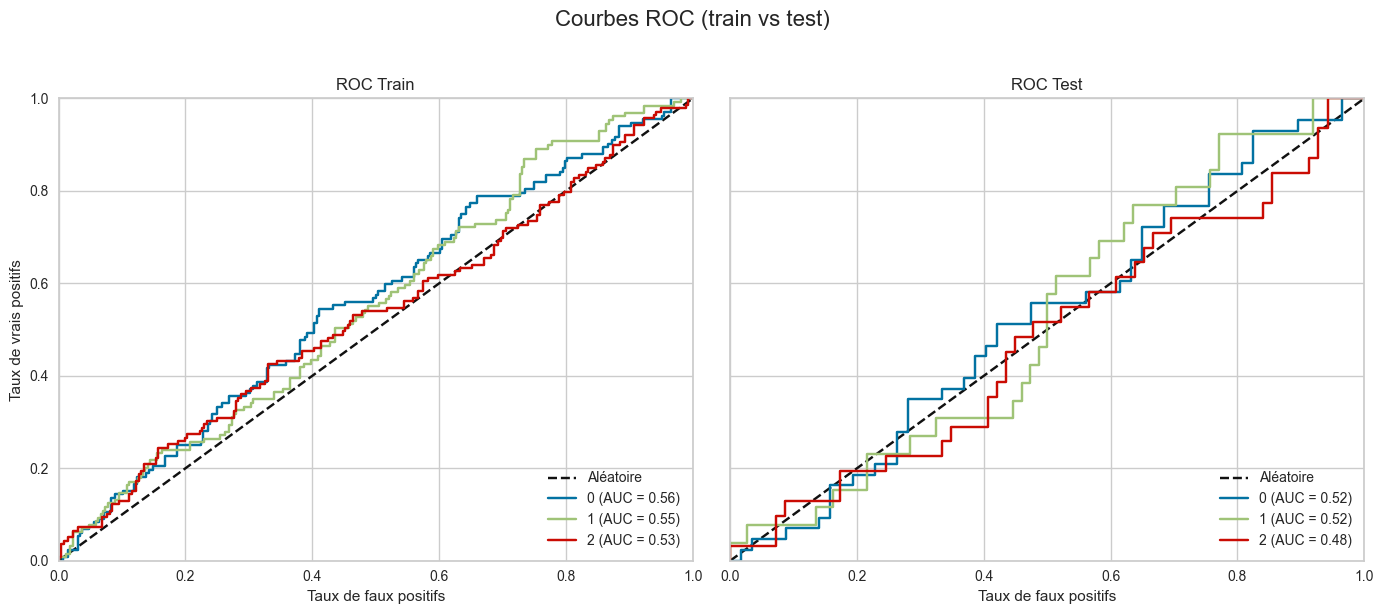

In [227]:

    
roc_curve_analysis(model, X_train, Y_train, X_test, Y_test)

## B- OPTIMISATION (Meuilleur model)

In [228]:
import  pycaret as py

In [229]:
from pycaret.classification import *

exp = setup(pd.read_csv("plant_disease_dataset.csv"), target='disease_type', train_size=0.8, normalize=True, normalize_method='minmax', fix_imbalance=True, fix_imbalance_method='smote', session_id=42)


,Description,Value
0,Session id,42
1,Target,disease_type
2,Target type,Multiclass
3,Target mapping,"blight: 0, mildew: 1, rust: 2"
4,Original data shape,"(540, 7)"
5,Transformed data shape,"(561, 11)"
6,Transformed train set shape,"(453, 11)"
7,Transformed test set shape,"(108, 11)"
8,Numeric features,3
9,Categorical features,3


In [230]:
best_model = compare_models(n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.3932,0.0000,0.3932,0.3996,0.3926,0.0891,0.0899,0.1000
dt,Decision Tree Classifier,0.3890,0.5399,0.3890,0.3926,0.3858,0.0809,0.0818,0.0360
lightgbm,Light Gradient Boosting Machine,0.3889,0.5699,0.3889,0.3938,0.3872,0.0805,0.0812,0.4230
rf,Random Forest Classifier,0.3728,0.5577,0.3728,0.3774,0.3702,0.0562,0.0573,0.0660
et,Extra Trees Classifier,0.3636,0.5638,0.3636,0.3662,0.3623,0.0442,0.0448,0.0620
dummy,Dummy Classifier,0.3496,0.5000,0.3496,0.1223,0.1812,0.0000,0.0000,0.0270
svm,SVM - Linear Kernel,0.3470,0.0000,0.3470,0.3647,0.3047,0.0236,0.0276,0.0330
lda,Linear Discriminant Analysis,0.3353,0.0000,0.3353,0.3359,0.3285,-0.0003,-0.0003,0.0270
ridge,Ridge Classifier,0.3330,0.0000,0.3330,0.3323,0.3249,-0.0039,-0.0045,0.0250
lr,Logistic Regression,0.3237,0.0000,0.3237,0.3253,0.3178,-0.0178,-0.0184,0.0270


# IV- Sauvegarde des models

In [ ]:
import pickle
pickle.dump(model, open("plant_disease_model.pkl", "wb"))
pickle.dump(best_model, open("plant_disease_best_model.pkl", "wb"))